In [38]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [39]:
pose_csv = 'Z:/KayCei/HDC/AH4-KO/120523-LIGHTS OFF/2023-12-05_16-06-25DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(234487, 12)


In [40]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
Z:/KayCei/HDC/AH4-KO/120523-LIGHTS OFF


### original data table

In [41]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               919.620789  599.979553   
3                                               917.313721  621.958923   
6                                               903.683289  634.013672   
9                                               896.431396  629.008606   
12                                              884.377014  625.228088   
15                                              881.351135  615.905823   
18                                              875.649536  599.165894   
21                                              878.273682  583.583252   
24                                              882.632690  569.463562   
27                                              882.348694  559.488098   
30                                              892.375427  549.888062   
33                                              883.639832  510.722351   
36                                              880.725098  508.991272   
39                                              888.531555  553.756409   
42                                              877.829041  513.367310   
45                                              881.546753  507.928528   
48                                              884.525085  509.153259   
51                                              884.570740  509.984100   
54                                              894.987915  546.191162   
57                                              894.969849  546.253540   
60                                              894.977478  546.258789   
63                                              894.969910  546.203003   
66                                              894.970642  546.198547   
69                                              886.298584  498.198425   
72                                              882.697998  500.412842   
75                                              885.475342  497.361511   
78                                              886.712280  499.268280   
81                                              883.131714  500.398163   
84                                              883.558716  532.335571   
87                                              889.106750  503.872253   
90                                              887.568787  498.184845   
93                                              886.661560  497.493561   
96                                              884.945923  533.438354   
99                                              885.977539  533.193054   
102                                             888.117371  530.656311   
105                                             882.890808  529.953796   
108                                             883.266968  530.753540   
111                                             887.571106  531.551208   
114                                             884.883789  534.216187   
117                                             885.778015  535.128906   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    946.972839  573.441650   0.999884   931.245789   
3           1.000000    941.218506  584.459778   0.999963   925.566956   
6           1.000000    938.642578  581.169739   0.985000   905.122986   
9           1.000000    946.027832  581.661255   0.999788   899.217773   
12          1.000000    903.298767  581.141663   0.999952   896.814148   
15          1.000000    905.648865  581.349243   0.999817   897.442627   
18          1.000000    902.716858  579.646667   1.000000   873.829773   
21          1.000000    905.252319  571.511597   0.999409   900.759888   
24 

### after removing likelihood and headers

In [42]:
pose[:5, :]

array([[919.62078857, 599.97955322, 946.97283936, 573.44165039,
        931.24578857, 503.83599854, 985.4786377 , 444.37054443,
        928.78771973, 472.43615723, 949.83239746, 409.72094727],
       [918.42156982, 608.27508545, 945.13269043, 581.33050537,
        930.14337158, 502.75234985, 984.39416504, 444.88955688,
        929.97827148, 479.40771484, 948.32086182, 414.72796631],
       [918.68481445, 615.4039917 , 944.1505127 , 583.22924805,
        927.83984375, 504.32913208, 984.50598145, 446.7350769 ,
        929.37640381, 480.58483887, 946.21862793, 422.38153076],
       [917.3137207 , 621.95892334, 941.21850586, 584.45977783,
        925.56695557, 509.45404053, 983.84259033, 448.00924683,
        929.0916748 , 480.56118774, 945.17333984, 429.08444214],
       [910.44812012, 626.44671631, 924.30224609, 537.50958252,
        891.98284912, 580.42657471, 982.53112793, 449.73693848,
        930.68670654, 481.7026062 , 945.60662842, 436.54998779]])

### plot

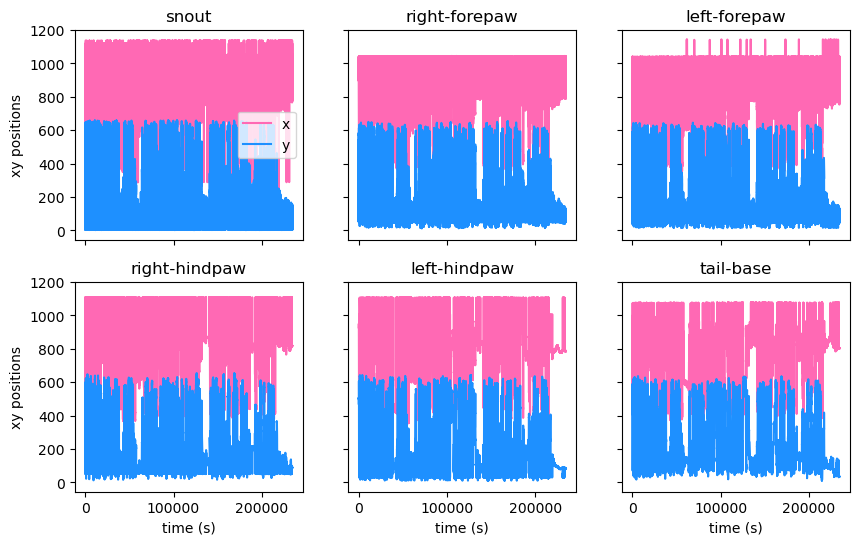

In [43]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [44]:
np.save('../processed_data/pose_video_exp_16.npy', pose)